First let's load the iris dataset and examine the feature names

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We will use the features petal length with column index 2 and petal width with column index 3 to group the examples by their classification. The examples can either be a setosa, versicolor or virginica with having an index of 0, 1 or 2, respectively.

In [0]:
X = data.data[:,(2,3)] 
y = data.target 
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
a=np.array([1,2,3,4,5])
shuffle_idx = np.arange(5)
np.random.shuffle(shuffle_idx)
a = a[shuffle_idx]
a

array([3, 5, 2, 1, 4])

In [0]:
# shuffle the dataset 
shuffle_idx = np.arange(np.size(y))
np.random.shuffle(shuffle_idx)
X = X[shuffle_idx]
y= y[shuffle_idx]


Using KMeans algorithm, lets predict the classification of each of the samples

In [0]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
#use k-means to predict each datarow's classification
#y_pred contains the flower's predicted cluster id
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit(X).predict(X)



In [0]:
import matplotlib.pyplot as plt

def plot_k_means(model, X,y_pred, k):
  #draw the cluster boundaries
  x1s = np.linspace(0,7, 1000)
  x2s = np.linspace(0,2.5, 1000)
  x1_mesh, x2_mesh = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
  y_new = model.predict(X_new)
  plt.contourf(x1_mesh, x2_mesh, y_new.reshape(x1_mesh.shape) ,cmap="Pastel2")
  plt.contour(x1_mesh, x2_mesh, y_new.reshape(x1_mesh.shape),linewidths=1, colors='k')

  #plot the data points
  plt.scatter(X[:,0], X[:,1],c=y_pred,marker='.' )

  #label the axes
  plt.xlabel('petal length')
  plt.ylabel('petal width')

  #add title
  plt.title ('k = {} clusters'.format(k))
  




<Figure size 504x216 with 0 Axes>

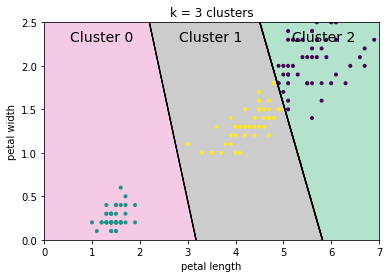

<Figure size 504x216 with 0 Axes>

In [0]:
#draw on a clean slate
plt.clf()

#plot the results
plot_k_means(kmeans,X,y_pred, 3)

#label the  boundaries
plt.annotate('Cluster 0', xytext=(0.18,0.85),xycoords='figure fraction',xy=(0,0),fontsize=14)
plt.annotate('Cluster 1', xytext=(0.46,0.85),xycoords='figure fraction',xy=(0,0),fontsize=14)
plt.annotate('Cluster 2', xytext=(0.75,0.85),xycoords='figure fraction',xy=(0,0),fontsize=14)
plt.figure(figsize=(7,3))

Let's try different number of clusters

<Figure size 432x288 with 0 Axes>

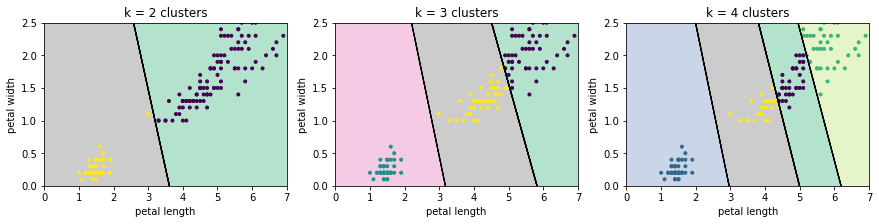

In [0]:
plt.clf()
plt.figure(figsize=(20,3))
for k in range(2,5):
  plt.subplot(1,4,k-1)
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
  y_pred = kmeans.predict(X)
  
  plot_k_means(kmeans,X,y_pred, k)

plt.show()
  

Choosing the best model



Text(0, 0.5, 'Inertia')

<Figure size 432x288 with 0 Axes>

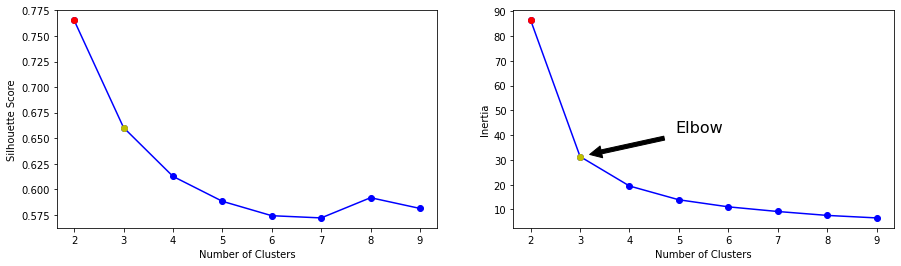

In [0]:
# variables to store silhouette score and inertia for different clusters
inertias = []
scores = []

from sklearn.metrics import silhouette_score

# Calcuate silhouette scores and inertia for different number of clusters
# For more information on silhouette scores and inertia, go to:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

for cluster_number in range(2,10):
  kmeans = KMeans(n_clusters=cluster_number, random_state=42).fit(X)
  inertias.append(kmeans.inertia_)  
  scores.append(silhouette_score(X,kmeans.labels_))

#plot the results
plt.clf()
plt.figure(figsize=(15,4))

#plot Silhouette Score
plt.subplot(121)
plt.plot(range(2,10), scores, 'bo-')
plt.plot(2, scores[0], 'ro-')
plt.plot(3, scores[1], 'yo-')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')


#plot Inertia
plt.subplot(122)
plt.plot(range(2,10), inertias, 'bo-')
plt.annotate(s='Elbow',xy=(3, inertias[1]),
             xytext=(0.75, 0.50),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.plot(2, inertias[0], 'ro-')
plt.plot(3, inertias[1], 'yo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


Choosing the best model

At 

In [0]:
from sklearn.cluster import MiniBatchKMeans
from timeit import timeit

run_time_full = []
run_time_mini=[]
run_time_accelerated = []

inertia_full = []
inertia_mini=[]
inertia_accelerated = []

max_k = 101
for k in range(1, max_k):
    kmeans_ = KMeans(n_clusters=k, random_state=42,algorithm='full')
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    accelerated_kmeans = KMeans(n_clusters=k, random_state=42 ,algorithm='elkan')
    print("\r{}/{}".format(k, 100), end="")
    run_time_full.append(timeit("kmeans_.fit(X)", number=10, globals=globals()))

    run_time_mini.append(timeit("minibatch_kmeans.fit(X)", number=10, globals=globals()))
    run_time_accelerated.append(timeit("accelerated_kmeans.fit(X)", number=10, globals=globals()))
    
    inertia_full.append(kmeans_.inertia_)
    inertia_mini.append(minibatch_kmeans.inertia_)
    inertia_accelerated.append(accelerated_kmeans.inertia_)
    

100/100

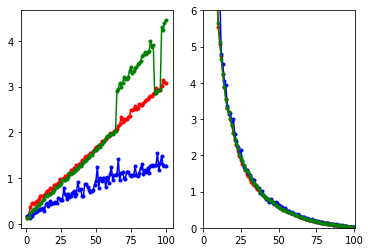

In [0]:
plt.clf()
plt.subplot(121)
plt.plot(range(1,max_k),run_time_full, 'r.-'  )
plt.plot(range(1,max_k),run_time_mini, 'b.-'  )
plt.plot(range(1,max_k),run_time_accelerated, 'g.-')

plt.subplot(122)
plt.axis([0, max_k, 0,6])
plt.plot(range(1,max_k),inertia_full, 'r.-'  )
plt.plot(range(1,max_k),inertia_mini, 'b.-'  )
plt.plot(range(1,max_k),inertia_accelerated, 'g.-'  )

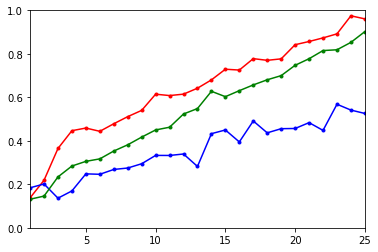

In [0]:
plt.clf()
plt.axis([1,25,0,1])
plt.plot(range(1,max_k),run_time_full, 'r.-'  )
plt.plot(range(1,max_k),run_time_mini, 'b.-'  )
plt.plot(range(1,max_k),run_time_accelerated, 'g.-')